In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 신용 카드 데이터를 활용해 금융 사기를 확인해보자.
* class 컬럼이 라벨을 의미하며 1인 경우가 fraud이다.
* 우리의 목표는 나머지 컬럼을 활용해 fraud인 경우를 감별하는 모델을 생성하는 것이다.
* time은 시간, amount는 사기의 규모를 의미한다.

In [4]:
print(f'Data size is {df.shape}')
print(f'Data column is {df.columns}')

Data size is (284807, 31)
Data column is Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


#### 정규화 진행
* amount,time의 경우엔 다른 피쳐에 비해 값이 지나치게 크므로 스케일링이 필요하다.

In [5]:
time = df['Time']
amount = df['Amount']
df['Time'] = (time - time.mean()) / time.std()
df['Amount'] = (amount - amount.mean()) / amount.std() 

#### 데이터 관찰
* 결측치는 얼마나 존재하는지 검사해본다.
* 각 컬럼 별로 어떤 의미를 가지는지 또 어떠한 상관 관계를 띄는지 확인해본다.
* 데이터의 전반적인 분포가 어떤 형태인지 확인해본다.

In [6]:
df.isna().sum().max() #데이터에 결측치가 존재하지 않는다.

0

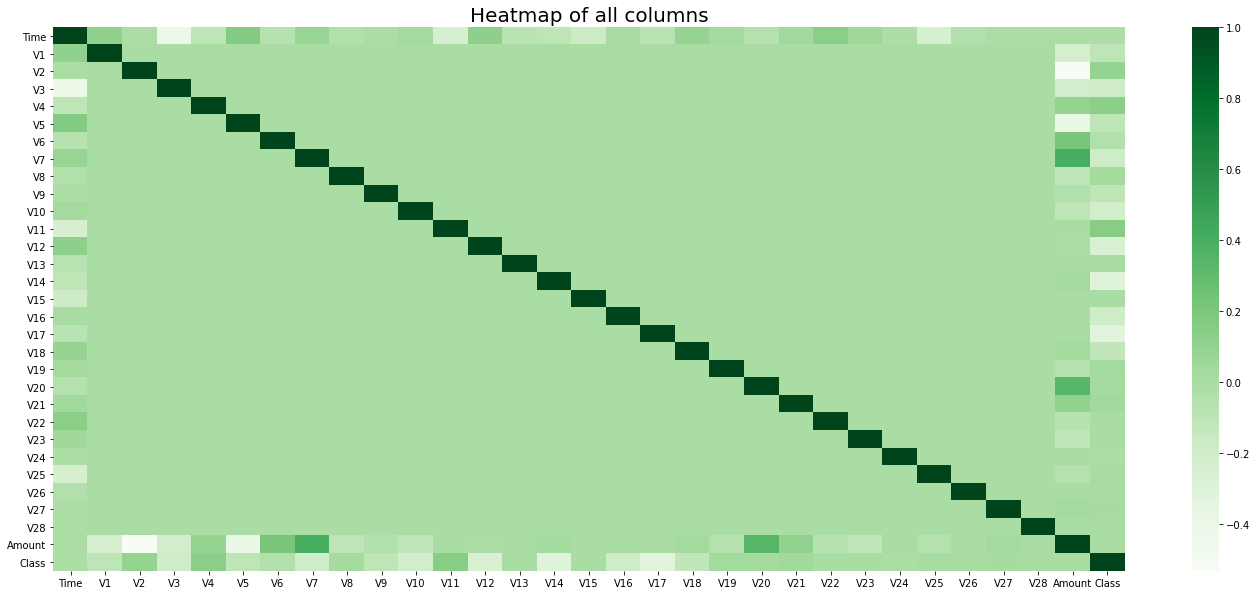

In [7]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(method='pearson'),cmap="Greens")
plt.title('Heatmap of all columns', fontsize=20)
plt.show()

#### 상관 관계가 거의 존재하지 않는다.
* 기묘하게도 v2~28사이의 상관 관계는 전무하다 싶이 한다.
* 상관 관계가 일절 존재하지 않는 다는 것은 두 피쳐가 서로 독립성을 띈다는 것을 의미한다.
* 그렇다면, 이는 독립벡터로 이뤄진 데이터이고 이에 따라 이전에 <b><u>PCA가 진행되었을 것이라는 추측을 할 수 있다.</u></b> (PCA를 진행하고 나면 기저벡터만 남음으로..)
> 그렇다면 30개나 되는 피쳐를 모조리 활용해야만 하냐는 것이다.

#### Skewed Data 문제
* 현재 데이터는 사기 데이터에 비해 사기가 아닌 데이터가 과하게 많이 존재한다.
* 이 경우 모델이 모든 케이스를 사기가 아니라고 대답한다 하더라도 높은 정확도가 보장된다.
* 데이터의 비대칭성을 방지하기 위해 오버 샘플링이나 다운 샘플링을 진행해야 한다.

None Fraud: 284315, Fraud :492


<AxesSubplot:>

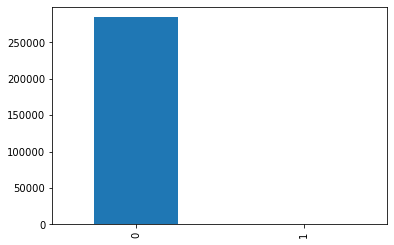

In [9]:
fraud = df[df['Class'] == 1]
print(f"None Fraud: {len(df.index) - len(fraud)}, Fraud :{len(fraud)}")
df['Class'].value_counts().plot.bar()

랜덤으로 샘플을 추출해 언더 샘플링을 적용해보자.

In [18]:
#다운 샘플링을 진행해보자 
down_sample = df.loc[df['Class'] == False].sample(n=int(len(fraud)))
down_sample = pd.concat([down_sample,fraud])
down_sample = down_sample.sample(frac=0.8, random_state=42)
down_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42756,-1.128300,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.353229,1
222095,1.010929,1.817438,-0.203405,-2.162074,0.177450,1.022982,0.597534,-0.030250,0.226835,0.434775,...,0.310145,0.986452,-0.073807,-1.715406,0.053910,0.006219,0.029547,-0.047121,-0.105948,0
111690,-0.473526,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,0.601912,1
149900,-0.055864,2.087264,0.223541,-1.638850,0.590592,0.514760,-0.757963,0.052028,-0.275136,1.875324,...,-0.531472,-1.206440,0.338410,0.302424,-0.279796,0.144569,-0.093474,-0.039540,-0.343274,0
112492,-0.466282,-1.032847,-0.687501,1.680568,-2.278279,-1.711903,-0.662416,-0.822389,0.540355,-2.511524,...,0.192511,0.449598,0.062803,0.484299,-0.084087,-0.278100,-0.033240,-0.000251,-0.007395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231978,1.098888,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,...,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,-0.321244,1
214662,0.946618,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,...,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,0.128700,1
42945,-1.126720,-13.680760,6.990389,-13.770001,8.694897,-11.426968,-2.919845,-14.594562,8.622905,-8.090697,...,2.989553,0.497599,-0.509290,0.732503,0.280528,0.280037,-1.406687,-0.663643,-0.350190,1
154960,0.189398,-4.517344,2.500224,-4.013928,1.189452,-2.486861,-1.413476,-4.245707,1.265087,1.168828,...,1.326944,0.102999,0.508167,-0.278018,0.139721,0.064610,-0.972358,0.351360,-0.344153,1


샘플의 분포가 알맞게 진행됐는지 살펴보자

<AxesSubplot:>

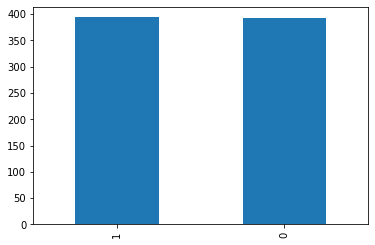

In [19]:
down_sample['Class'].value_counts().plot.bar()

이제 데이터 셋을 학습, 검증, 테스트 셋으로 분리하자.

In [20]:
x_test = df.drop(down_sample.index).iloc[:,:-1]
y_test = df['Class'].iloc[x_test.index]


SVM을 활용해 모델을 학습 시켜보자.

In [21]:
from sklearn import svm
X_train = down_sample.iloc[:,:-1]
y_train = down_sample.iloc[:,-1]
SVM = svm.SVC(C = 1, kernel='rbf',gamma='auto')
SVM.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [15]:
def get_f1(prediction, label_data, C):
    from sklearn.metrics import accuracy_score
    pos_true = label_data.loc[(prediction == 1) & (label_data == prediction)].size
    pos_false = label_data.loc[(prediction == 1) & (label_data != prediction)].size
    neg_false = label_data.loc[(prediction == 0) & (label_data != prediction)].size
    print(pos_true, pos_false, neg_false)
    precision = pos_true / (pos_true + pos_false + 1) * 100
    recall = pos_true / (pos_true + neg_false + 1) * 100
    f1_score = 2 * (precision * recall) / (precision + recall + 1)
    accuracy = accuracy_score(prediction, label_data) * 100
    # print(f'precision:{precision}, recall:{recall}, f1:{f1_score}')
    # print(f'accuracy:{accuracy}')
    return {'C': C, 'accuracy': accuracy, 'recall': recall, 'precision': precision, 'F1-score': f1_score}

In [16]:
prediction = SVM.predict(X_train)
get_f1(prediction, y_train, 1)

461 2 31


{'C': 1,
 'accuracy': 96.64634146341463,
 'recall': 93.50912778904666,
 'precision': 99.35344827586206,
 'F1-score': 95.84577363708827}

In [22]:
prediction = SVM.predict(x_test)
get_f1(prediction,y_test,1)

91 14772 7


{'C': 1,
 'accuracy': 94.79649320470389,
 'recall': 91.91919191919192,
 'precision': 0.6122174381054898,
 'F1-score': 1.2033290757871793}